# Machine Learning Group Project - Group 50
## Masters in Data Science and Advanced Analytics at NOVA IMS, Lisbon

## Group Information
Group members: **<span style="color:red">(Everyone please check and correct the names)</span><br>**
Md. Shawkatul Islam Aziz<br>
Md. Tahir Hossain<br>
Philipp Metzger<br>
Ali Sabbir<br>
Henrique Vaz<br>

## Import all libraries needed

In [4]:
import os
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [5]:
train = pd.read_excel(os.path.join('Data', 'Train.xlsx'), sheet_name='Sheet1')
test = pd.read_excel(os.path.join('Data', 'Test.xlsx'), sheet_name='Sheet1')

## First exploration of the training set

In [6]:
# Show the first three rows of 'train'
train.head(3)

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1


In [7]:
# Get the dimensions of 'train'
train.shape

(22400, 15)

In [8]:
# Check the data types and check if there are missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
dtypes:

In [9]:
# Get the basic descriptive statistics on 'train'
train.describe()

,CITIZEN_ID,Years of Education,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,23685.500000,13.173884,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,2.512451,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,12.000000,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,13.000000,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,15.000000,45.000000,0.000000,0.000000,0.000000
max,34885.000000,21.000000,99.000000,122999.000000,5358.000000,1.000000


In [10]:
# Find out the share of individuals with income higher than average and lower than average
higher = len(train.Income[train.Income==1])
lower = len(train.Income[train.Income==0])

percentage_higher = higher / len(train.Income) * 100
percentage_lower = lower / len(train.Income) * 100

print(round(percentage_higher,2), '% in the training set have a higher than average income.')
print(round(percentage_lower,2), '% in the training set have a lower than average income.')

23.71 % in the training set have a higher than average income.
76.29 % in the training set have a lower than average income.


## Transform 'Birthday' to datetime format and get the age in days relative to today

In [11]:
# Define a function that maps month names to their integers

def monthToInt(monthStr):

    return {
            'January' : 1,
            'February' : 2,
            'March' : 3,
            'April' : 4,
            'May' : 5,
            'June' : 6,
            'July' : 7,
            'August' : 8,
            'September' : 9, 
            'October' : 10,
            'November' : 11,
            'December' : 12
    }[monthStr]

In [12]:
# Define a function that checks if a year is a leap year
# Adapted from:
# https://www.programiz.com/python-programming/examples/leap-year

# "A leap year is exactly divisible by 4 except for century years (years ending with 00). 
# The century year is a leap year only if it is perfectly divisible by 400."

def is_leapyear(year):
    if (year % 4) == 0:
        if (year % 100) == 0:
            if (year % 400) == 0:
                return True
            else:
                return False
        else:
            return True
    else:
        return False

In [13]:
# Define a function that takes uses the information from column 'Birthday' and adds a column that contains the
# birthdays as datetime objects and another column that contains the age of the person in days relative to today (2020)

def add_Birthday_date_Age_days_rel_to_2020(df):
    
    # Make a copy
    df_copy = df.copy()
    
    # Get the year, month and day from Strings in 'Birthday'
    split = df_copy.Birthday.str.split(',', expand=True)
    year = split.iloc[:,1].astype(int)
    month_day = split.iloc[:,0].str.strip(to_strip=' ').str.split(' ', expand=True)
    day = month_day.iloc[:,1].astype(int)
    month = month_day.iloc[:,0]
    
    # Map month names to integers
    month = month.map(lambda x:monthToInt(x))
    
    # Build a dataframe containing the date values
    frame = {'year':year, 'month':month, 'day':day}
    birthday = pd.DataFrame(frame)
    
    # Create datetime objects from the date values
    # Some problems with leap years (see below)
    birthday_date = []
    for i in range(birthday.shape[0]):
    
        # Get the values for this row
        year_i = int(birthday.iloc[i,0])
        month_i = int(birthday.iloc[i,1])
        day_i = int(birthday.iloc[i,2])

        # Leap years are incorrectly defined for this dataset.
        # For example row 359: year 2022, month 2, day 29 is a birthday in this datase, but in reality it does not exist.
        # -> Decrease all days where month=2 and day=29 that aren't in a leap year by 1 day to be able to use 
        # datetime.date

        # Get True if this year is a leap year, else False
        leapyear = is_leapyear(year_i)

        if (~leapyear and month_i==2 and day_i==29):
            day_i = day_i - 1
        date = datetime.date(year_i, month_i, day_i)
        birthday_date.append(date)
        
    # Convert the list to a pandas series
    birthday_date = pd.Series(birthday_date)
    
    # Insert 'birthday_date' as new column 'Birthday_date'
    df_copy.insert(loc=3, column='Birthday_date', value=birthday_date)
    
    # Compute time differences to today (2020) and keep only the value in days
    now = date.today()
    age = now - df_copy.Birthday_date
    age_days = age.dt.days
    
    # Insert 'age_days' as 'Age_days_rel_to_2020'
    df_copy.insert(loc=4, column='Age_days_rel_to_2020', value=age_days)
    
    # Return the resulting dataframe
    return df_copy

In [14]:
# Use the function defined above to add columns 'Birthday_date' and 'Age_days_rel_to_2020' to 'train'
train_2 = add_Birthday_date_Age_days_rel_to_2020(train)

In [15]:
# Drop columns 'Birthday' and 'Birthday_date'
train_2 = train_2.drop(columns=['Birthday', 'Birthday_date'])

In [16]:
# Check the result
train_2.head(3)

,CITIZEN_ID,Name,Age_days_rel_to_2020,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,6356,Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,5417,Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,4216,Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1


In [17]:
train = train_2

## Compute and visualise the correlations between the metric features and the target

In [18]:
# Define metric features and target in one list
metric_features_and_target = ['Age_days_rel_to_2020','Years of Education','Working Hours per week','Money Received','Ticket Price','Income']

In [19]:
# Compute the correlation matrix of 'train'
corr_pearson = train_2[metric_features_and_target].corr(method='pearson')
corr_spearman = train_2[metric_features_and_target].corr(method='spearman')

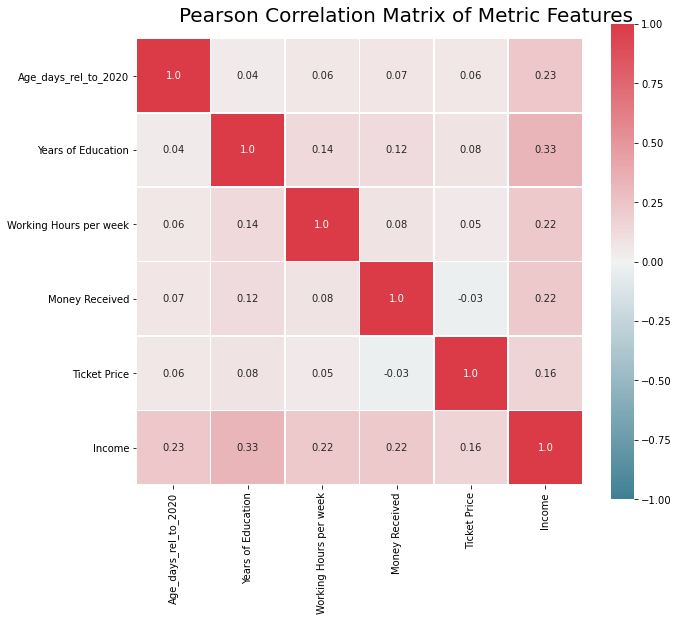

In [20]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_pearson, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.001
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix of Metric Features", fontsize=20)

plt.show()

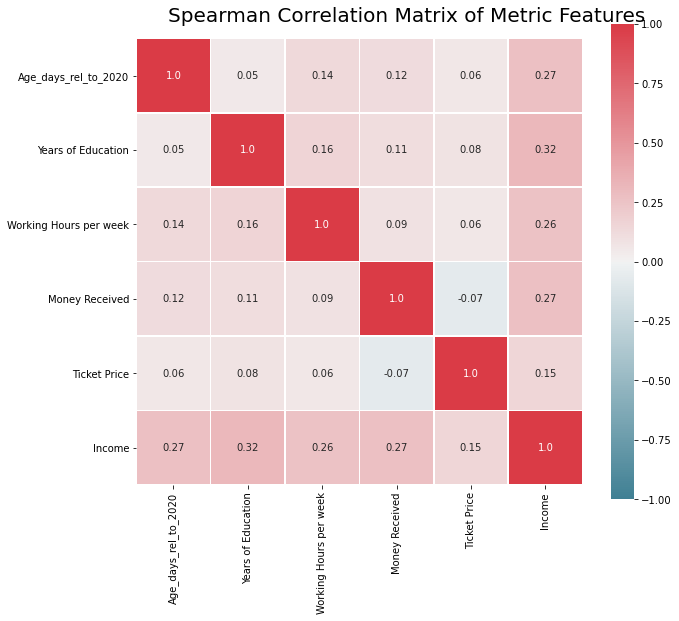

In [21]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_spearman, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.001
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix of Metric Features", fontsize=20)

plt.show()

## Assessing the discriminatory power of the categorical features

In [22]:
# Adapted from Machine learning lab "Feature Selection"
def bar_charts_categorical(df, feature, target, rotation):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    ax1 = plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.setp(ax1.get_xticklabels(), rotation=rotation, horizontalalignment='right')
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    ax2 = plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.setp(ax2.get_xticklabels(), rotation=rotation, horizontalalignment='right')
    plt.ylabel("$p$")

    plt.show()

### Discriminatory power of 'Native Continent'

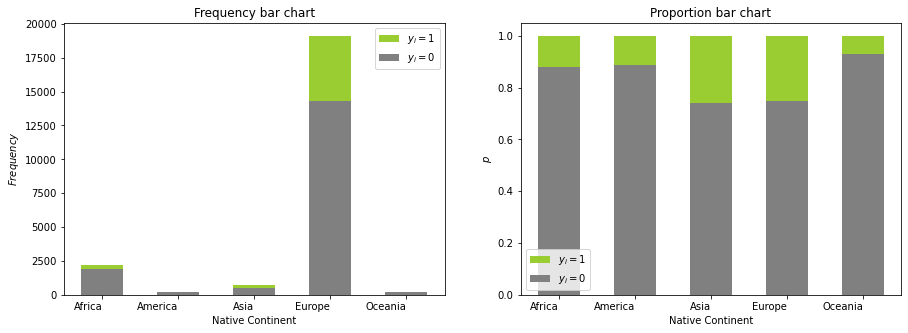

In [23]:
bar_charts_categorical(train, 'Native Continent', 'Income', 0)

### Discriminatory power of 'Marital Status'

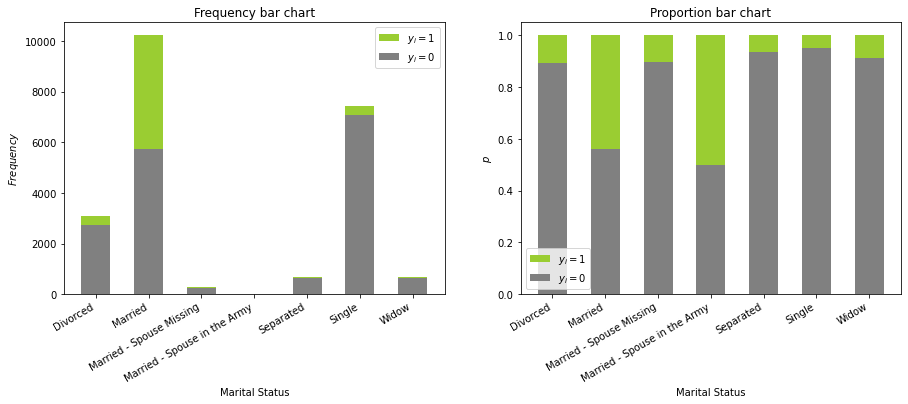

In [24]:
bar_charts_categorical(train, 'Marital Status', 'Income', 30)

### Discriminatory power of 'Lives with'

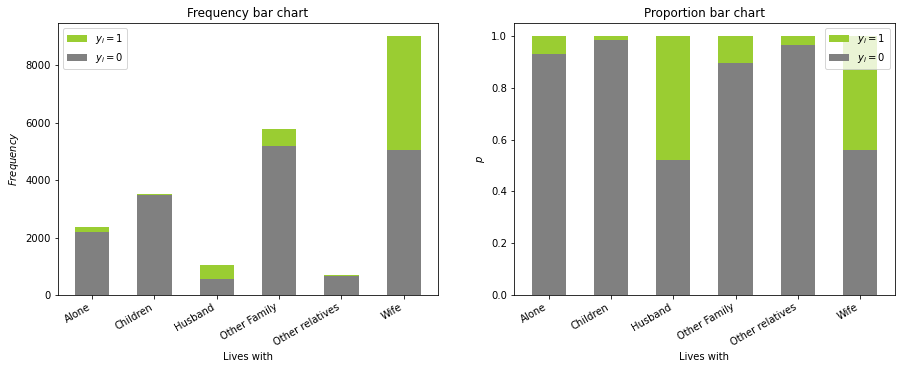

In [25]:
bar_charts_categorical(train, 'Lives with', 'Income', 30)

### Discriminatory power of 'Base Area'

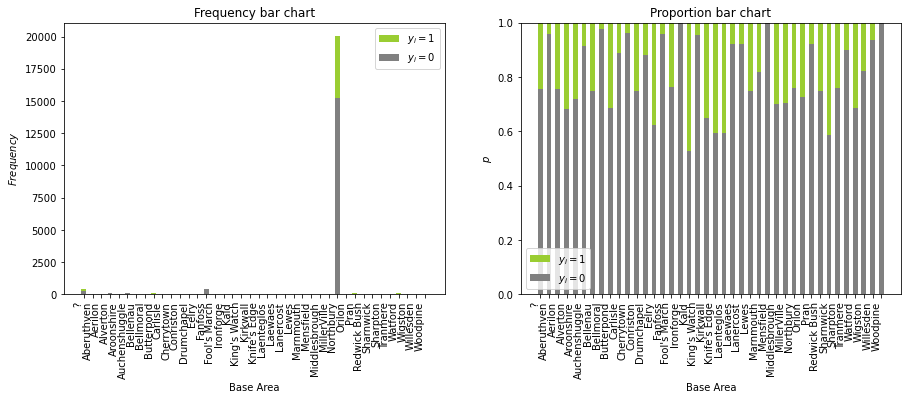

In [26]:
bar_charts_categorical(train, 'Base Area', 'Income', 90)

### Discriminatory power of 'Education Level'

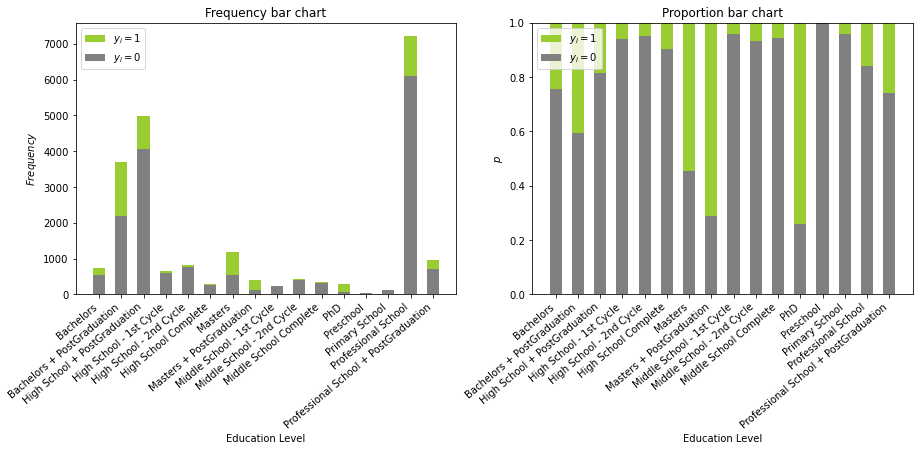

In [27]:
bar_charts_categorical(train, 'Education Level', 'Income', 40)

### Discriminatory power of  'Employment Sector'

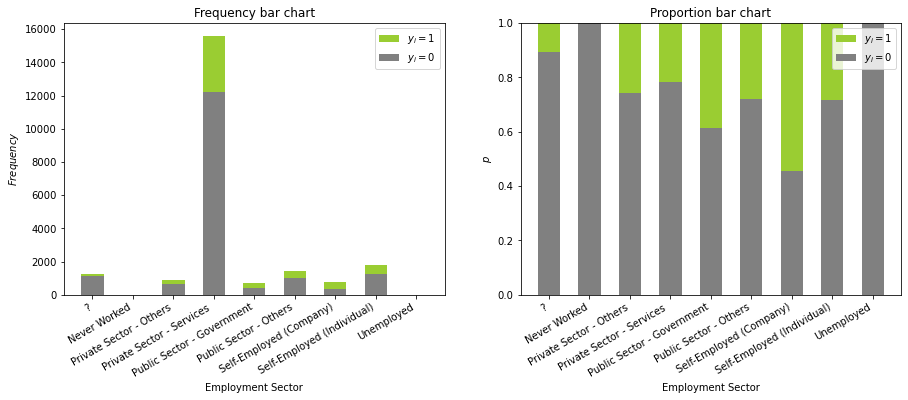

In [28]:
bar_charts_categorical(train, 'Employment Sector', 'Income', 30)

### Discriminatory power of  'Role'

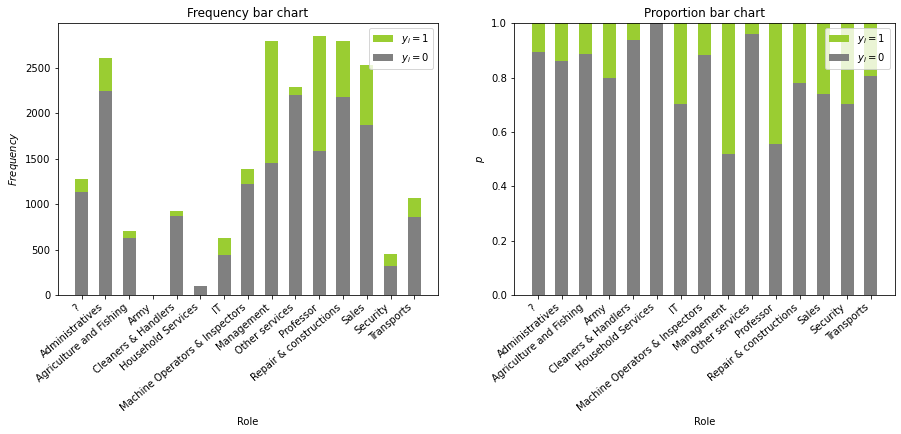

In [29]:
bar_charts_categorical(train, 'Role', 'Income', 40)

### Transform 'Ticket Price' into a binary variable and assess its discriminatory power

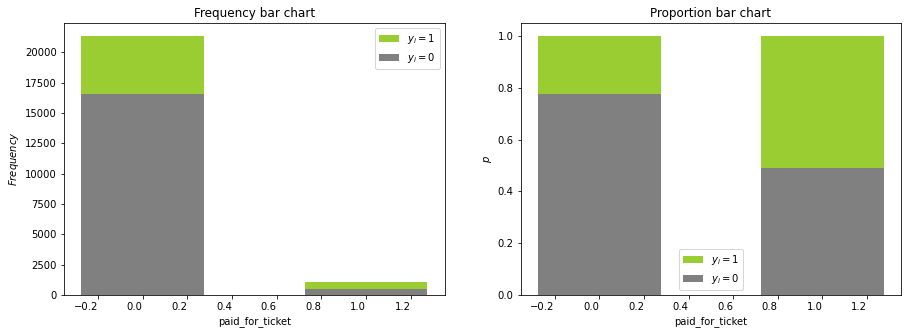

In [30]:
def make_binary(item):
    if item!=0:
        item=1
    return item

paid_for_ticket = train['Ticket Price'].map(lambda x:make_binary(x))
train_copy = train.copy()
train_copy.insert(loc=train_copy.shape[1]-1 , column='paid_for_ticket', value=paid_for_ticket)

bar_charts_categorical(train_copy, 'paid_for_ticket', 'Income', 0)

## One-hot encode categorical features
### One-hot encode 'Native Continent'

In [32]:
# Define a function that replaces a column by a set of columns
def replace_col(df, col_name, new_cols):
    df_copy = df.copy()
    col_index = df_copy.columns.get_loc(col_name)
    df_copy = df_copy.drop(columns=col_name)
    for col in range(new_cols.shape[1]):
        df_copy.insert(loc=col_index+col, column=list(new_cols)[col], value=new_cols.iloc[:,col])
    return df_copy    

In [33]:
# Define a function that one-hot encodes a column
def one_hot_encode(df, col_name, prefix):
    
    df_copy = df.copy()
    
    # Print the unique values to be one-hot encoded
    print('Unique values to be one-hot encoded:')
    print(pd.unique(df_copy[col_name]))
    
    # Compute dummy matrix
    y = pd.get_dummies(df_copy[col_name], prefix=prefix, dtype=float)
    
    if False:
        # Keeping all five variables would lead to one column being exactly the negation of the sum of the 
        # other columns. Show this:
        a = y.iloc[:,0]
        for col in range(1, y.shape[1]-1):
            a_=y.iloc[:,col]
            a=a+a_
        b=y.iloc[:, y.shape[1]-1]
        print()
        print('Correlation matrix of the sum of the first n-1 dummy features with the n-th dummy feature:')
        print(np.corrcoef(a.values,b.values))
    
    # Discard the last dummy column because of this (See code block above)
    y = y.drop(list(y)[y.shape[1]-1], axis=1)
    
    # Print the column that was discarded
    print()
    print('Column dropped (Case for which all dummy values = 0):')
    print(list(y)[y.shape[1]-1])
    
    # Use 'replace_col'
    df_copy = replace_col(df_copy, col_name, y)
    
    # Return the result
    return df_copy

In [34]:
# Use 'one_hot_encode' on 'Native Continent'
train_3 = one_hot_encode(train_2, 'Native Continent', 'Native_Continent')

Unique values to be one-hot encoded:
['Europe' 'Africa' 'Asia' 'America' 'Oceania']

Column dropped (Case for which all dummy values = 0):
Native_Continent_Europe


In [35]:
# Print the column labels of the resulting dataframe
list(train_3)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital Status',
 'Lives with',
 'Base Area',
 'Education Level',
 'Years of Education',
 'Employment Sector',
 'Role',
 'Working Hours per week',
 'Money Received',
 'Ticket Price',
 'Income']

In [36]:
# Use 'one_hot_encode' on 'Marital Status'
train_4 = one_hot_encode(train_3, 'Marital Status', 'Marital_Status')

Unique values to be one-hot encoded:
['Married' 'Single' 'Married - Spouse Missing' 'Divorced' 'Separated'
 'Widow' 'Married - Spouse in the Army']

Column dropped (Case for which all dummy values = 0):
Marital_Status_Single


In [37]:
# Print the column labels of the resulting dataframe
list(train_4)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives with',
 'Base Area',
 'Education Level',
 'Years of Education',
 'Employment Sector',
 'Role',
 'Working Hours per week',
 'Money Received',
 'Ticket Price',
 'Income']

In [38]:
# Use 'one_hot_encode' on 'Lives with'
train_5 = one_hot_encode(train_4, 'Lives with', 'Lives_with')

Unique values to be one-hot encoded:
['Wife' 'Other Family' 'Children' 'Other relatives' 'Alone' 'Husband']

Column dropped (Case for which all dummy values = 0):
Lives_with_Other relatives


In [39]:
# Print the column labels of the resulting dataframe
list(train_5)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base Area',
 'Education Level',
 'Years of Education',
 'Employment Sector',
 'Role',
 'Working Hours per week',
 'Money Received',
 'Ticket Price',
 'Income']

In [40]:
# Use 'one_hot_encode' on 'Base Area'
train_6 = one_hot_encode(train_5, 'Base Area', 'Base_Area')

Unique values to be one-hot encoded:
['Northbury' 'Auchenshuggle' 'Sharnwick' 'Laewaes' 'MillerVille' '?'
 'Fanfoss' 'Wigston' "Knife's Edge" 'Aerilon' 'Watford' 'Lanercost'
 'Bellmoral' 'Marnmouth' 'Bellenau' 'Butterpond' 'Laenteglos' 'Tranmere'
 'Eelry' 'Alverton' 'Pran' 'Willesden' "King's Watch" 'Kald' 'Kirkwall'
 "Fool's March" 'Middlesbrough' 'Orilon' 'Aroonshire' 'Aberuthven'
 'Sharpton' 'Lewes' 'Mensfield' 'Cherrytown' 'Redwick Bush' 'Drumchapel'
 'Carlisle' 'Conriston' 'Woodpine' 'Ironforge']

Column dropped (Case for which all dummy values = 0):
Base_Area_Willesden


In [41]:
# Print the column labels of the resulting dataframe
list(train_6)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base_Area_?',
 'Base_Area_Aberuthven',
 'Base_Area_Aerilon',
 'Base_Area_Alverton',
 'Base_Area_Aroonshire',
 'Base_Area_Auchenshuggle',
 'Base_Area_Bellenau',
 'Base_Area_Bellmoral',
 'Base_Area_Butterpond',
 'Base_Area_Carlisle',
 'Base_Area_Cherrytown',
 'Base_Area_Conriston',
 'Base_Area_Drumchapel',
 'Base_Area_Eelry',
 'Base_Area_Fanfoss',
 "Base_Area_Fool's March",
 'Base_Area_Ironforge',
 'Base_Area_Kald',
 "Base_Area_King's Watch",
 'Base_Area_Kirkwall',
 "Base_Area_Knife's Edge",
 'Base_Area_La

In [42]:
# Use 'one_hot_encode' on 'Base Area'
# train_7 = one_hot_encode(train_6, 'Education Level', 'Education_Level')

In [43]:
# Print the column labels of the resulting dataframe
# list(train_7)

In [45]:
# Use 'one_hot_encode' on 'Base Area'
train_8 = one_hot_encode(train_6, 'Employment Sector', 'Employment_Sector')

Unique values to be one-hot encoded:
['Private Sector - Services ' 'Public Sector - Others'
 'Self-Employed (Individual)' 'Private Sector - Others' '?'
 'Self-Employed (Company)' 'Public Sector - Government' 'Unemployed'
 'Never Worked']

Column dropped (Case for which all dummy values = 0):
Employment_Sector_Self-Employed (Individual)


In [46]:
# Print the column labels of the resulting dataframe
list(train_8)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base_Area_?',
 'Base_Area_Aberuthven',
 'Base_Area_Aerilon',
 'Base_Area_Alverton',
 'Base_Area_Aroonshire',
 'Base_Area_Auchenshuggle',
 'Base_Area_Bellenau',
 'Base_Area_Bellmoral',
 'Base_Area_Butterpond',
 'Base_Area_Carlisle',
 'Base_Area_Cherrytown',
 'Base_Area_Conriston',
 'Base_Area_Drumchapel',
 'Base_Area_Eelry',
 'Base_Area_Fanfoss',
 "Base_Area_Fool's March",
 'Base_Area_Ironforge',
 'Base_Area_Kald',
 "Base_Area_King's Watch",
 'Base_Area_Kirkwall',
 "Base_Area_Knife's Edge",
 'Base_Area_La

In [47]:
# Use 'one_hot_encode' on 'Base Area'
train_9 = one_hot_encode(train_8, 'Role', 'Role')

Unique values to be one-hot encoded:
['Repair & constructions' 'Sales' 'Security' 'Professor'
 'Cleaners & Handlers' 'Other services' 'Machine Operators & Inspectors'
 'Management' 'Administratives' 'Transports' '?' 'Agriculture and Fishing'
 'IT' 'Household Services' 'Army']

Column dropped (Case for which all dummy values = 0):
Role_Security


In [43]:
# Print the column labels of the resulting dataframe
list(train_9)

['CITIZEN_ID',
 'Name',
 'Age_days_rel_to_2020',
 'Native_Continent_Africa',
 'Native_Continent_America',
 'Native_Continent_Asia',
 'Native_Continent_Europe',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Married - Spouse Missing',
 'Marital_Status_Married - Spouse in the Army',
 'Marital_Status_Separated',
 'Marital_Status_Single',
 'Lives_with_Alone',
 'Lives_with_Children',
 'Lives_with_Husband',
 'Lives_with_Other Family',
 'Lives_with_Other relatives',
 'Base_Area_?',
 'Base_Area_Aberuthven',
 'Base_Area_Aerilon',
 'Base_Area_Alverton',
 'Base_Area_Aroonshire',
 'Base_Area_Auchenshuggle',
 'Base_Area_Bellenau',
 'Base_Area_Bellmoral',
 'Base_Area_Butterpond',
 'Base_Area_Carlisle',
 'Base_Area_Cherrytown',
 'Base_Area_Conriston',
 'Base_Area_Drumchapel',
 'Base_Area_Eelry',
 'Base_Area_Fanfoss',
 "Base_Area_Fool's March",
 'Base_Area_Ironforge',
 'Base_Area_Kald',
 "Base_Area_King's Watch",
 'Base_Area_Kirkwall',
 "Base_Area_Knife's Edge",
 'Base_Area_La

In [51]:
# Creating a classification for the education level. First we'll check the values
set(list(train_9['Education Level']))

{'Bachelors',
 'Bachelors + PostGraduation',
 'High School + PostGraduation',
 'High School - 1st Cycle',
 'High School - 2nd Cycle',
 'High School Complete',
 'Masters',
 'Masters + PostGraduation',
 'Middle School - 1st Cycle',
 'Middle School - 2nd Cycle',
 'Middle School Complete',
 'PhD',
 'Preschool',
 'Primary School',
 'Professional School',
 'Professional School + PostGraduation'}

In [56]:
# Since the results represent a gradient and there are different levels of time investment in them we can classify
# them from lowest to largest

# Create a dictionary with the classification according to 'National Center for Education Statistics'
edu_classification = {1 : 'Preschool',
                      2 : 'Primary School',
                      3 : 'Middle School - 1st Cycle',
                      4 : 'Middle School - 2nd Cycle',
                      5 : 'Middle School Complete',
                      6 : 'High School - 1st Cycle',
                      7 : 'High School - 2nd Cycle',
                      8 : 'Professional School',
                      9 : 'High School Complete',
                      10 : 'Professional School + PostGraduation',
                      11 : 'High School + PostGraduation',
                      12 : 'Bachelors',
                      13 : 'Bachelors + PostGraduation',
                      14 : 'Masters',
                      15 : 'Masters + PostGraduation',
                      16 : 'PhD'
}

In [74]:
# Now we will create an auxiliar function that receives a level and assigns its corresponding classification 

def edu_classifier(level, classifier = edu_classification):
    """This funtion receives a level of education and a dictionary with education levels classification and returns
    the classification of a given level of education."""
    # List all the classifications in a specific order
    classif = list(edu_classification.keys())
    # List the education levels in the same order than the classifications
    edu_level = list(edu_classification.values())
    # Get the value where the given level's index does match in both lists
    return classif[edu_level.index(level)]

In [86]:
# Create a new column in the dataset using the classifications

train_9['Education_Level_Classified'] = train_9['Education Level'].apply(edu_classifier)

# Check the results

train_9[['Education Level', 'Education_Level_Classified']].head()

In [88]:
train_enc = train_9
train_enc

,CITIZEN_ID,Name,Age_days_rel_to_2020,Native_Continent_Africa,Native_Continent_America,Native_Continent_Asia,Native_Continent_Europe,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Married - Spouse Missing,...,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Working Hours per week,Money Received,Ticket Price,Income,Education_Level_Classified
0,12486,Mr. Adam Glover,6356,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,40,0,2273,1,11
1,12487,Mr. Cameron McDonald,5417,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,40,0,0,1,8
2,12488,Mr. Keith Davidson,4216,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,46,0,2321,1,8
3,12489,Mr. Alexander Gill,13028,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,37,5395,0,1,7
4,12490,Mr. Neil Piper,2006,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,45,0,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,-841,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,40,0,0,0,8
22396,34882,Mr. Julian Coleman,-1564,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,35,0,0,0,8
22397,34883,Miss Amelia Walker,-603,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,40,2674,0,0,14
22398,34884,Mr. Justin Sutherland,3454,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,90,0,0,1,13


In [89]:
train_enc.corr()

,CITIZEN_ID,Age_days_rel_to_2020,Native_Continent_Africa,Native_Continent_America,Native_Continent_Asia,Native_Continent_Europe,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Married - Spouse Missing,Marital_Status_Married - Spouse in the Army,...,Role_Other services,Role_Professor,Role_Repair & constructions,Role_Sales,Role_Security,Working Hours per week,Money Received,Ticket Price,Income,Education_Level_Classified
CITIZEN_ID,1.000000,0.010138,0.003506,-0.003728,-0.006893,0.000847,-0.005248,0.004005,0.010529,-0.004138,...,0.003279,-0.002506,0.000831,-0.008645,0.004470,-0.006226,0.008200,-0.005254,-0.001914,-0.001086
Age_days_rel_to_2020,0.010138,1.000000,-0.025684,-0.008701,-0.011803,0.039511,0.135152,0.311321,0.012264,-0.010416,...,-0.089084,0.048710,0.009079,-0.034292,0.004465,0.064918,0.072770,0.055792,0.233070,0.005976
Native_Continent_Africa,0.003506,-0.025684,1.000000,-0.032684,-0.059035,-0.792901,0.015333,-0.131574,0.020530,-0.008226,...,0.086788,-0.047922,-0.046827,-0.029033,0.036517,-0.058433,-0.018898,-0.022299,-0.091428,-0.072752
Native_Continent_America,-0.003728,-0.008701,-0.032684,1.000000,-0.017833,-0.239520,0.014463,-0.018136,0.021182,-0.002485,...,0.000960,-0.012057,0.002298,-0.011100,-0.001292,-0.006343,-0.005958,-0.013225,-0.028723,-0.033173
Native_Continent_Asia,-0.006893,-0.011803,-0.059035,-0.017833,1.000000,-0.432622,-0.035724,0.015523,0.039329,-0.004488,...,0.012409,0.033210,-0.022702,-0.005662,-0.012887,-0.005338,0.012960,0.002866,0.009218,0.059213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Working Hours per week,-0.006226,0.064918,-0.058433,-0.006343,-0.005338,0.056703,0.031900,0.204864,-0.000980,-0.011230,...,-0.159432,0.063207,0.056685,0.008407,0.026706,1.000000,0.075471,0.052959,0.219890,0.119749
Money Received,0.008200,0.072770,-0.018898,-0.005958,0.012960,0.012312,-0.020187,0.085617,-0.004663,-0.001221,...,-0.038512,0.081048,-0.023997,0.010553,-0.007138,0.075471,1.000000,-0.031330,0.221440,0.111945
Ticket Price,-0.005254,0.055792,-0.022299,-0.013225,0.002866,0.023740,-0.027682,0.080798,-0.006742,-0.005457,...,-0.040903,0.050977,0.000778,0.004487,-0.000621,0.052959,-0.031330,1.000000,0.155890,0.076885
Income,-0.001914,0.233070,-0.091428,-0.028723,0.009218,0.089213,-0.122472,0.435207,-0.035966,0.015459,...,-0.157131,0.185721,-0.014195,0.020857,0.020428,0.219890,0.221440,0.155890,1.000000,0.315202


In [92]:
# CReate a new correlation matrix with new features
new_metric_features_and_target = ['Age_days_rel_to_2020','Years of Education','Working Hours per week','Money Received','Ticket Price', 'Education_Level_Classified','Income']

In [93]:
# Compute the correlation matrix of 'train'
corr_pearson = train_enc[new_metric_features_and_target].corr(method='pearson')
corr_spearman = train_enc[new_metric_features_and_target].corr(method='spearman')

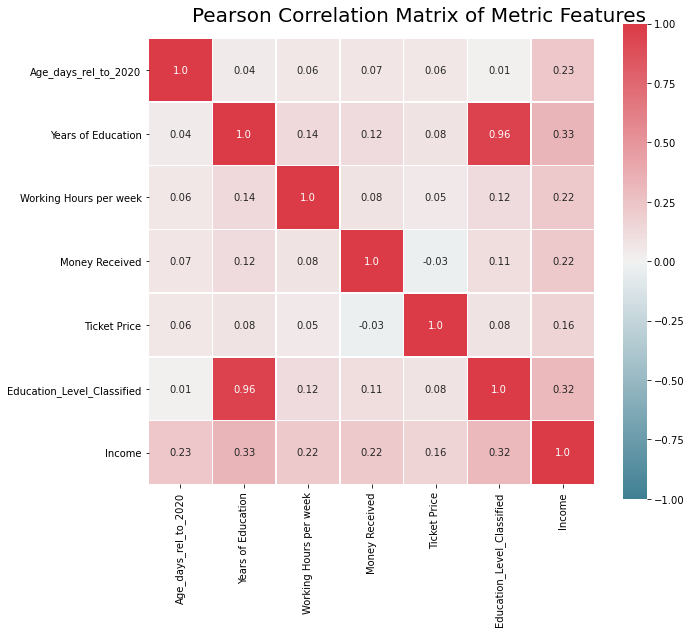

In [94]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_pearson, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.001
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix of Metric Features", fontsize=20)

plt.show()

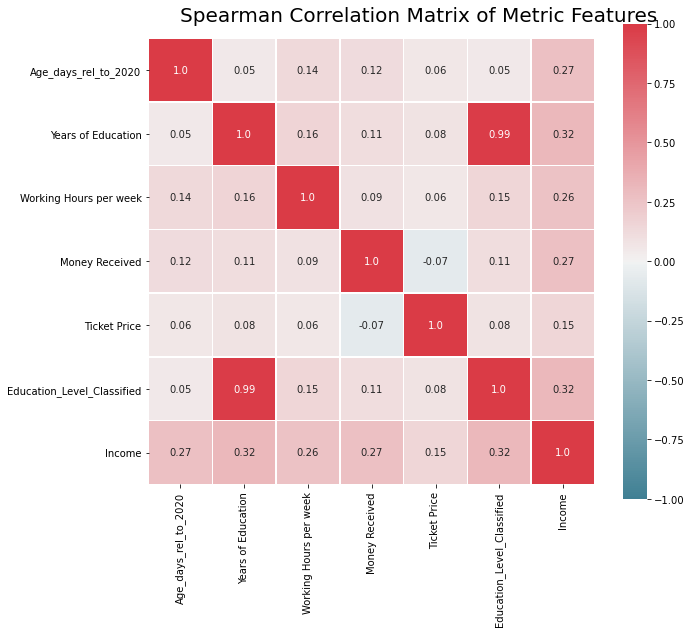

In [95]:
# Adapted from data mining lab 4:

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Round the values of the correlation matrix
corr_rounded = np.round(corr_spearman, decimals=2)

# Build annotation matrix (values above |limit| will appear annotated in the plot)
limit=0.001
mask_annot = np.absolute(corr_rounded.values) >= limit
annot = np.where(mask_annot, corr_rounded.values, np.full(corr_rounded.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr_rounded, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix of Metric Features", fontsize=20)

plt.show()